In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#11.  How does the fare distribution vary across different passenger classes (Pclass)?

<Axes: xlabel='pclass', ylabel='fare'>

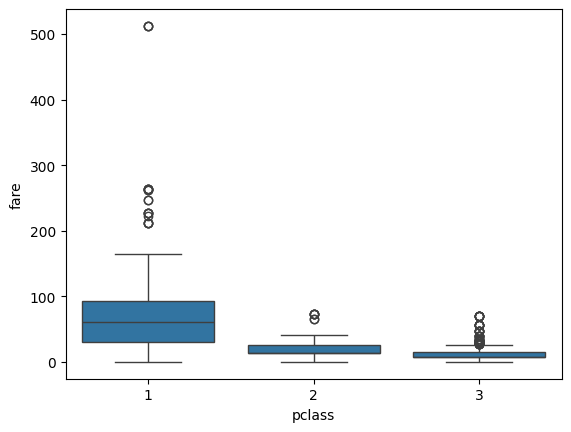

In [8]:
sns.boxplot(x = 'pclass', y = 'fare', data = titanic)

#12.  What is the relationship between age and survival rates?

<Axes: xlabel='survived', ylabel='age'>

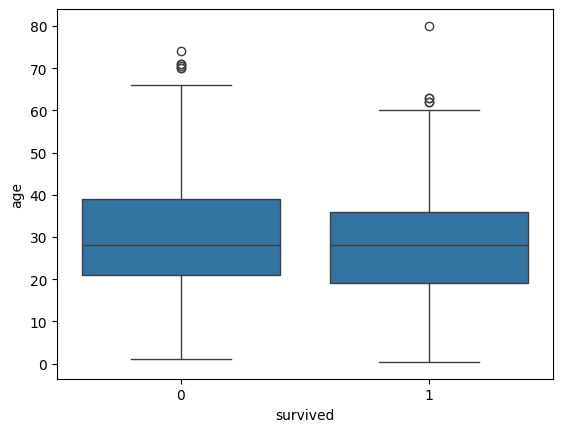

In [9]:
sns.boxplot(x = 'survived', y = 'age', data = titanic)

In [10]:
data_survived = titanic[titanic['survived'] == 1]['age']

In [11]:
data_not_survived = titanic[titanic['survived'] == 0]['age']

<Axes: xlabel='age', ylabel='Density'>

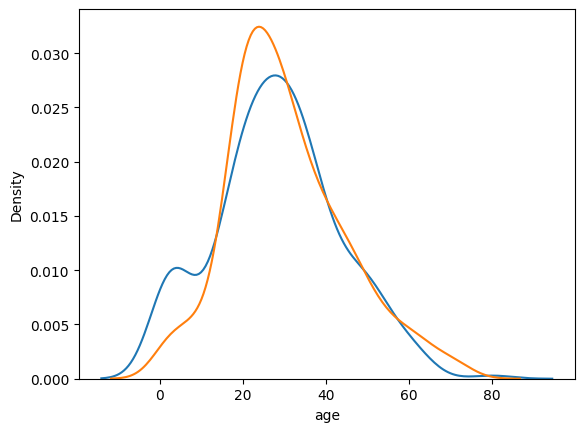

In [12]:
sns.kdeplot (data = data_survived, label = 'survived')
sns.kdeplot (data = data_not_survived, label = 'not survived')

#13.  . What is the correlation between Fare, Pclass, and survival?

In [13]:
corr_matrix = titanic[['fare', 'pclass', 'survived']].corr()

In [14]:
corr_matrix

,fare,pclass,survived
fare,1.000000,-0.549500,0.257307
pclass,-0.549500,1.000000,-0.338481
survived,0.257307,-0.338481,1.000000


<Axes: >

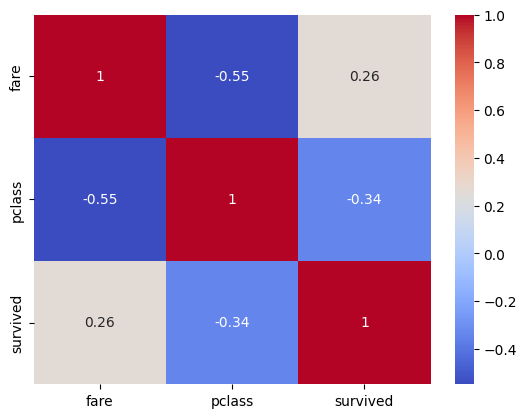

In [15]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

<Axes: xlabel='pclass', ylabel='fare'>

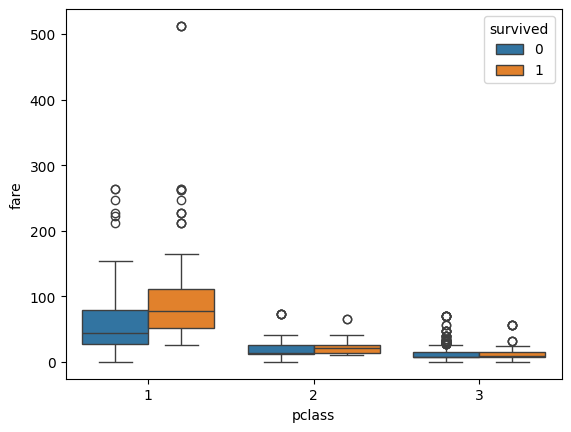

In [17]:
sns.boxplot(x = 'pclass', y = 'fare', hue = 'survived', data = titanic)

#14.  What are the age ranges of survivors vs. non-survivors?

In [18]:
data_survived.describe()

,age
count,290.000000
mean,28.343690
std,14.950952
min,0.420000
25%,19.000000
50%,28.000000
75%,36.000000
max,80.000000


In [19]:
data_not_survived.describe()

,age
count,424.000000
mean,30.626179
std,14.172110
min,1.000000
25%,21.000000
50%,28.000000
75%,39.000000
max,74.000000


#15.  Are younger passengers more likely to survive compared to older passengers?

In [21]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [22]:
bins = [0,12,18,30,50,80]
labels = ['child(0-12)', 'teen(12-18)', 'young adult(19-30)',
         'adult(31-50)', 'old(51-80)']

In [23]:
titanic['age_group'] = pd.cut(titanic['age'], bins = bins, labels = labels)    #cut continuous column (numerical)

In [24]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult(19-30)
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult(31-50)
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young adult(19-30)
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult(31-50)
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult(31-50)


In [25]:
age_group_survival = titanic.groupby('age_group')['survived'].mean()     #.mean means rate

<ipython-input-25-05b7a3077a88>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = titanic.groupby('age_group')['survived'].mean()     #.mean means rate


In [26]:
age_group_survival

,survived
age_group,
child(0-12),0.579710
teen(12-18),0.428571
young adult(19-30),0.355556
adult(31-50),0.423237
old(51-80),0.343750


([0, 1, 2, 3, 4],
 [Text(0, 0, 'child(0-12)'),
  Text(1, 0, 'teen(12-18)'),
  Text(2, 0, 'young adult(19-30)'),
  Text(3, 0, 'adult(31-50)'),
  Text(4, 0, 'old(51-80)')])

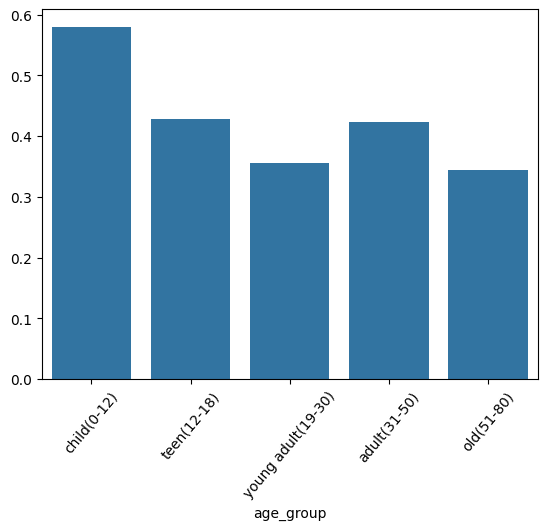

In [27]:
sns.barplot(x = age_group_survival.index, y = age_group_survival.values)
plt.xticks(rotation = 50)

In [28]:
age_group_survival.reset_index()

,age_group,survived
0,child(0-12),0.579710
1,teen(12-18),0.428571
2,young adult(19-30),0.355556
3,adult(31-50),0.423237
4,old(51-80),0.343750
